In [1]:
import copy

import prody
from rdkit import Chem
from rdkit.Chem import Draw

from rgroup import rep2D, draw3D, draw3Dcons, merge_R_group, tox_props, Mol, generate_conformers

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
# load the complex with the ligand
sys = prody.parsePDB('5NEV.pdb1')
rec = sys.select('not (nucleic or hetatm) and not water')
mol = sys.select('resname 72L')

prody.writePDB('rec.pdb', rec)
prody.writePDB('lig.pdb', mol)

@> 4485 atoms and 1 coordinate set(s) were parsed in 0.04s.


'lig.pdb'

In [3]:
# !obabel lig.pdb -O ligh.sdf -h -p 7

*** Open Babel Warning  in DoTransformations
  Both -p and -h options are set. All implicit hydrogens (-h) will be added without considering pH.

1 molecule converted


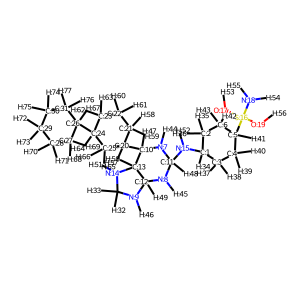

In [7]:
# load the ligand
init_mol = Chem.MolFromPDBFile('lig.pdb')
init_mol = Chem.AddHs(init_mol, addCoords=True)

# select the atom to be replaced with the R group
Draw.MolToImage(rep2D(init_mol))

In [ ]:
# load the R group
R_group = Chem.MolFromMolFile('data/rgroups/molecules/alcohols/propane-1_2_3-triol-r.mol', removeHs=False)
draw3D(R_group)

In [ ]:
draw3D(init_mol)

In [ ]:
mol = merge_R_group(init_mol, R_group, 72)
draw3D(mol)

In [ ]:
Draw.MolToImage(rep2D(mol, idx=False))

In [ ]:
toxicity = tox_props(mol)
toxicity

In [ ]:
# visualise the template
draw3D(mol.template)

In [ ]:
draw3D(mol)

In [ ]:
cons = generate_conformers(mol, mol.template, num_conf=20, minimum_conf_rms=0.5)

In [ ]:
draw3Dcons(cons)

In [ ]:
cons.GetNumConformers()